<a href="https://colab.research.google.com/github/Begizew2112/10academykifiya-AIM-week0/blob/main/thesis%20progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#connect with google drive to load the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# import all necessary libraries to the preprocessing and **modeling**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#load the data and change the working processing to T4 GPU
import tensorflow as tf
#load the data in to the workin area
with tf.device('/GPU:0'):
#load the 500000 data
    df = pd.read_csv('/content/drive/MyDrive/bearing_data.csv')

In [5]:

# #reduce the data size for sampling
# # Check the length
# original_len = len(df500000)
# target_len = 200_000

# # Downsample by selecting every N-th row
# step = original_len // target_len
# df_downsampled = df500000.iloc[::step]

# # If it overshoots, trim to exactly 200,000 rows
# df= df_downsampled.head(target_len)


In [6]:
# check the sample input data
df.head()

,x_direction,y_direction,bearing tem,env temp
0,-0.117601,-0.378231,41.614912,24.817354
1,0.912196,-0.221813,41.614912,24.817354
2,-0.605148,0.464697,41.614912,24.817354
3,-0.007149,-0.264295,41.614912,24.817354
4,-0.023456,-0.030204,41.614912,24.817354


In [7]:
#check the size of the data
df.shape

(516000, 4)

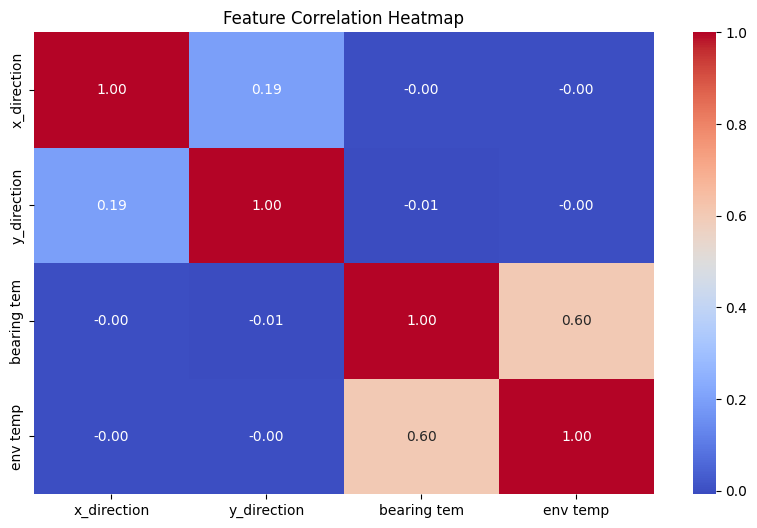

In [8]:
#view and interprate the correlation analysis of the given columns
# Heatmap of feature correlations
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [9]:
df1 = df.copy()

In [10]:

total_rows = len(df1)

In [11]:

total_rows

516000

In [12]:
# Compute elapsed hours
df1['elapsed_hours'] = (np.arange(total_rows) / total_rows) * 128

In [13]:
# Compute RUL , the total life fo the bearing is 128 hour
df1['RUL'] = 128 - df1['elapsed_hours']

In [14]:
df2= df1.copy()

In [15]:
# view the sample data of the first and the last four rows
print(df2.head())
print(df2.tail())

   x_direction  y_direction  bearing tem   env temp  elapsed_hours         RUL
0    -0.117601    -0.378231    41.614912  24.817354       0.000000  128.000000
1     0.912196    -0.221813    41.614912  24.817354       0.000248  127.999752
2    -0.605148     0.464697    41.614912  24.817354       0.000496  127.999504
3    -0.007149    -0.264295    41.614912  24.817354       0.000744  127.999256
4    -0.023456    -0.030204    41.614912  24.817354       0.000992  127.999008
        x_direction  y_direction  bearing tem   env temp  elapsed_hours  \
515995    -0.910407     1.731289   100.413611  26.643185     127.998760   
515996     2.371830     1.522305   100.413611  26.643185     127.999008   
515997    -2.155841     1.547009   100.413611  26.643185     127.999256   
515998    -1.781344     1.536919   100.413611  26.643185     127.999504   
515999    -2.776817     3.094306   100.413611  26.643185     127.999752   

             RUL  
515995  0.001240  
515996  0.000992  
515997  0.000744  

In [16]:
#check if there is any empty value in the data and fill with appropriate filling method
df2.isnull().sum()

,0
x_direction,12
y_direction,12
bearing tem,0
env temp,0
elapsed_hours,0
RUL,0


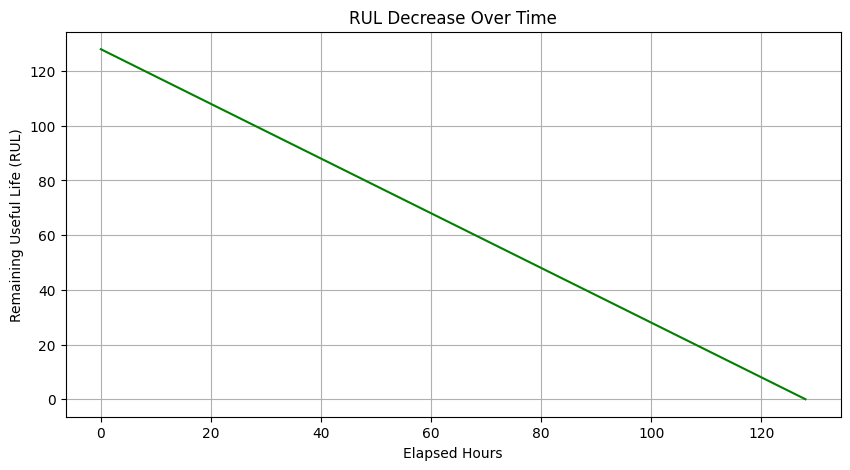

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(df2['elapsed_hours'], df2['RUL'], color='green')
plt.xlabel('Elapsed Hours')
plt.ylabel('Remaining Useful Life (RUL)')
plt.title('RUL Decrease Over Time')
plt.grid(True)
plt.show()

In [18]:
df2.head()

,x_direction,y_direction,bearing tem,env temp,elapsed_hours,RUL
0,-0.117601,-0.378231,41.614912,24.817354,0.000000,128.000000
1,0.912196,-0.221813,41.614912,24.817354,0.000248,127.999752
2,-0.605148,0.464697,41.614912,24.817354,0.000496,127.999504
3,-0.007149,-0.264295,41.614912,24.817354,0.000744,127.999256
4,-0.023456,-0.030204,41.614912,24.817354,0.000992,127.999008


# This code generates a line plot to visualize how the sensor readings for both 'x_direction' and 'y_direction' change over time

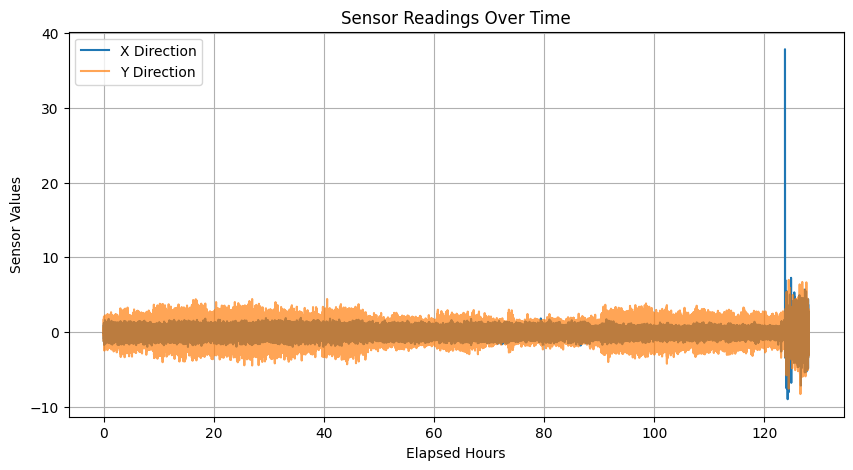

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(df2['elapsed_hours'], df2['x_direction'], label='X Direction')
plt.plot(df2['elapsed_hours'], df2['y_direction'], label='Y Direction', alpha=0.7)
plt.xlabel('Elapsed Hours')
plt.ylabel('Sensor Values')
plt.title('Sensor Readings Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# plt.figure(figsize=(6, 6))
# plt.scatter(df2['x_direction'], df2['y_direction'], c=df2['RUL'], cmap='viridis', s=1)
# plt.xlabel('X Direction')
# plt.ylabel('Y Direction')
# plt.title('Sensor Reading Space (colored by RUL)')
# plt.colorbar(label='RUL')
# plt.grid(True)
# plt.show()

In [21]:

# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure(figsize=(10, 7))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(df2['elapsed_hours'], df2['x_direction'], df2['y_direction'], c=df2['RUL'], cmap='coolwarm', s=1)
# ax.set_xlabel('Elapsed Hours')
# ax.set_ylabel('X Direction')
# ax.set_zlabel('Y Direction')
# ax.set_title('3D Visualization of Sensor Readings')
# plt.show()


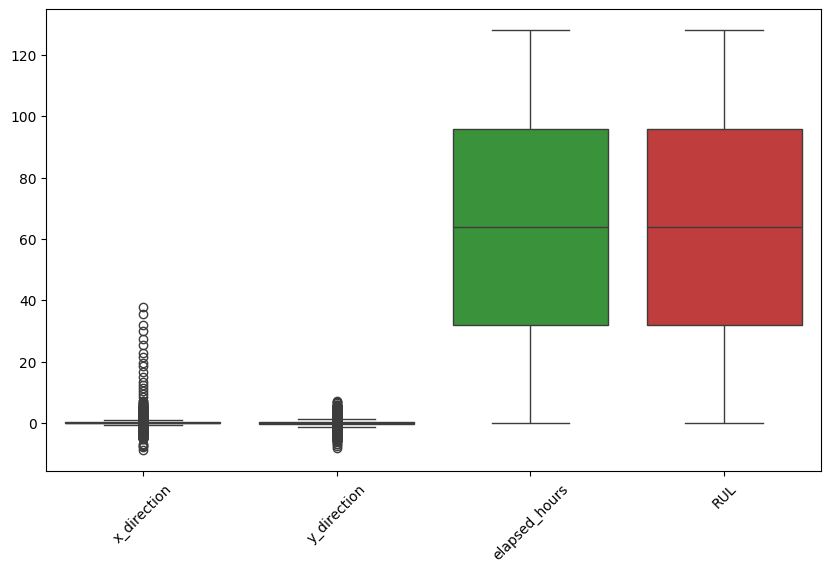

In [22]:

# Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df2[["x_direction", "y_direction", "elapsed_hours", "RUL"]])
plt.xticks(rotation=45)
plt.show()

In [23]:
df2.shape

(516000, 6)

In [24]:
df3 = df2.drop(['bearing tem','env temp'],axis = True)  #drop the bearing temperature and environmental temperature

In [25]:
df3.head()

,x_direction,y_direction,elapsed_hours,RUL
0,-0.117601,-0.378231,0.000000,128.000000
1,0.912196,-0.221813,0.000248,127.999752
2,-0.605148,0.464697,0.000496,127.999504
3,-0.007149,-0.264295,0.000744,127.999256
4,-0.023456,-0.030204,0.000992,127.999008


In [26]:
df3.shape

(516000, 4)

# This code cleans the dataset by removing outliers to ensure higher-quality data for training the machine learning model. It first calculates the first quartile (Q1) and third quartile (Q3) for each feature in df2, then computes the interquartile range (IQR) as the difference between Q3 and Q1. Using the IQR method, it defines lower and upper bounds to detect outliers. Any data points lying below the lower bound or above the upper bound are considered outliers.

In [27]:

#clean the outlier to get the most useable data for the the traing of the model
Q1 = df3.quantile(0.25)
Q3 = df3.quantile(0.75)
IQR = Q3 - Q1

# Define lower & upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter out outliers
df4 = df3[~((df3 < lower_bound) | (df3 > upper_bound)).any(axis=1)]

In [28]:
df4.shape

(478412, 4)

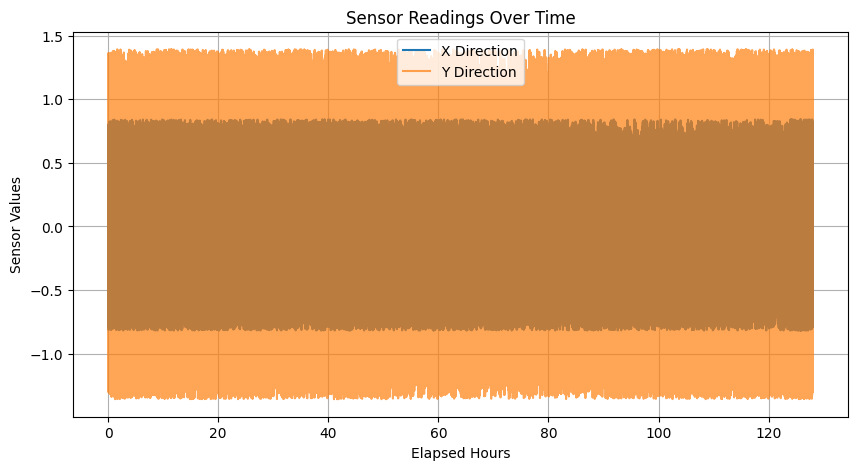

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(df4['elapsed_hours'], df4['x_direction'], label='X Direction')
plt.plot(df4['elapsed_hours'], df4['y_direction'], label='Y Direction', alpha=0.7)
plt.xlabel('Elapsed Hours')
plt.ylabel('Sensor Values')
plt.title('Sensor Readings Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
df4.shape

(478412, 4)

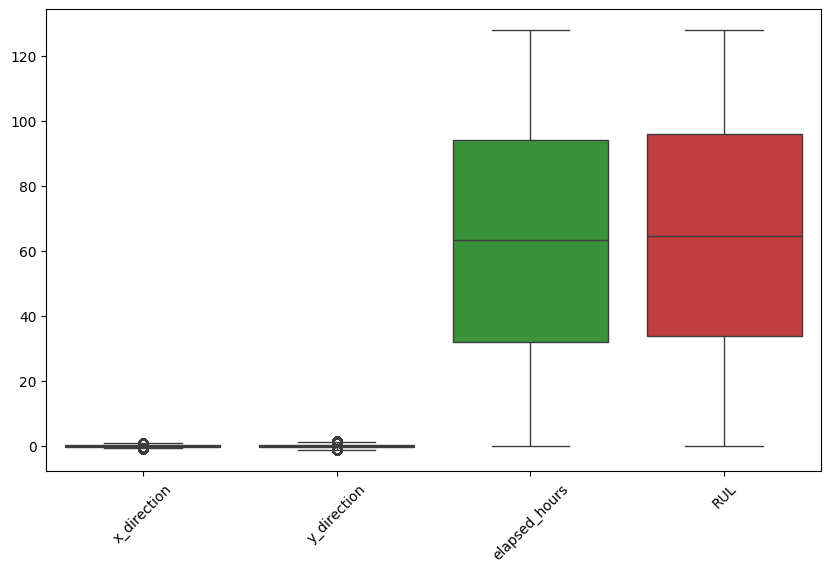

In [31]:
# Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df4[["x_direction", "y_direction", "elapsed_hours", "RUL"]])
plt.xticks(rotation=45)
plt.show()

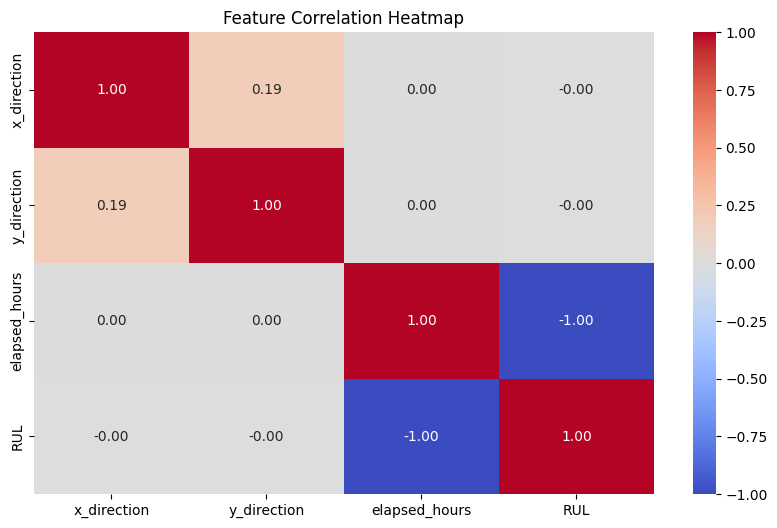

In [32]:
# Heatmap of feature correlations
plt.figure(figsize=(10,6))
sns.heatmap(df4.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

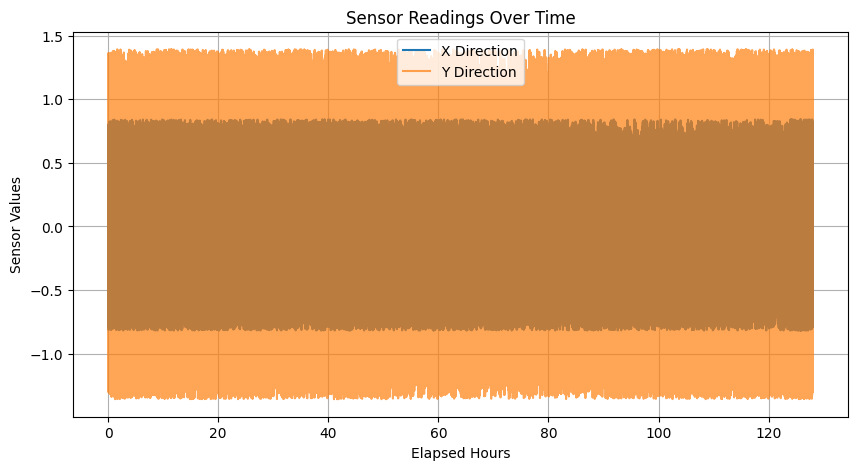

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(df4['elapsed_hours'], df4['x_direction'], label='X Direction')
plt.plot(df4['elapsed_hours'], df4['y_direction'], label='Y Direction', alpha=0.7)
plt.xlabel('Elapsed Hours')
plt.ylabel('Sensor Values')
plt.title('Sensor Readings Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
df4.shape

(478412, 4)

In [35]:
df5 =df4.copy()

In [36]:
# Rolling mean
df5["rolling_mean_x"] = df5["x_direction"].rolling(window=5).mean()
df5["rolling_mean_y"] = df5["y_direction"].rolling(window=5).mean()

# Exponential weighted moving average
df5["ewma_x"] = df5["x_direction"].ewm(span=5).mean()
df5["ewma_y"] = df5["y_direction"].ewm(span=5).mean()

# Difference between consecutive time steps
df5["delta_x"] = df5["x_direction"].diff()
df5["delta_y"] = df5["y_direction"].diff()

# normalization of the given data for better accuracy between 0 and 1

In [37]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Select only numerical columns
cols_to_scale = ["x_direction", "y_direction", 'RUL',"elapsed_hours", "rolling_mean_x", "rolling_mean_y", "ewma_x", "ewma_y", "delta_x", "delta_y"]
df5[cols_to_scale] = scaler.fit_transform(df5[cols_to_scale])

In [38]:
df5.head()

,x_direction,y_direction,elapsed_hours,RUL,rolling_mean_x,rolling_mean_y,ewma_x,ewma_y,delta_x,delta_y
0,0.422154,0.356205,0.000000,1.000000,NaN,NaN,0.420360,0.304686,NaN,NaN
2,0.128524,0.662569,0.000004,0.999996,NaN,NaN,0.197253,0.564409,0.350152,0.654136
3,0.488674,0.397615,0.000006,0.999994,NaN,NaN,0.342838,0.469098,0.680562,0.363194
4,0.478854,0.482696,0.000008,0.999992,NaN,NaN,0.404865,0.475042,0.493584,0.541448
5,0.524977,0.627327,0.000010,0.999990,0.394172,0.515123,0.460800,0.556703,0.521858,0.571774


In [39]:
df5.isnull().sum()

,0
x_direction,12
y_direction,12
elapsed_hours,0
RUL,0
rolling_mean_x,64
rolling_mean_y,64
ewma_x,0
ewma_y,0
delta_x,25
delta_y,25


In [40]:
df6 = df5.dropna()

In [41]:
df6.isnull().sum()

,0
x_direction,0
y_direction,0
elapsed_hours,0
RUL,0
rolling_mean_x,0
rolling_mean_y,0
ewma_x,0
ewma_y,0
delta_x,0
delta_y,0


In [42]:
def create_sequences_fast(data, seq_length):
    data = data.to_numpy()  # Convert DataFrame to NumPy once!
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])  # Features
        y.append(data[i+seq_length, -1])    # Target (RUL)
    return np.array(X), np.array(y)

# Create sequences with a length of 50 (can adjust)
seq_length = 50
X, y = create_sequences_fast(df6, seq_length)


In [43]:
X.shape

(478298, 50, 9)

In [44]:
# Chronological train-test split
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]


In [45]:
X_train.shape

(382638, 50, 9)

In [46]:
X_test.shape

(95660, 50, 9)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Define LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    BatchNormalization(),
    Dense(1, activation='linear')  # Output layer
])

# Compile model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss=tf.keras.losses.Huber(), metrics=['mae'])

# Show summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 64)         │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,521 (123.13 KB)

 Trainable params: 31,457 (122.88 KB)

 Non-trainable params: 64 (256.00 B)

In [48]:

#Train model
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_data=(X_test, y_test))
# Train the model
#history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/30
1224/2990 ━━━━━━━━━━━━━━━━━━━━ 3:26 117ms/step - loss: 0.0942 - mae: 0.3369

KeyboardInterrupt: 

In [ ]:
y_pred = model.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(y_test[:400], "bo", label="Actual RUL")  # Blue dots
plt.plot(y_pred[:400], "rx", label="Predicted RUL")  # Red crosses
plt.xlabel("Sample Index")
plt.ylabel("Remaining Useful Life (RUL)")
plt.legend()
plt.title("Predicted vs Actual RUL")
plt.show()

In [ ]:
# Predict using the model
y_pred = model.predict(X_test)

# --- Denormalize from [0, 1] to real hours (assuming max life is 128 hours) ---
MAX_RUL_HOURS = 128

y_pred_hours = y_pred * MAX_RUL_HOURS
y_test_hours = y_test * MAX_RUL_HOURS

# --- Print the first few values ---
print("First 10 Predicted RULs in hours:", y_pred_hours[:10].flatten())
print("First 10 Actual RULs in hours:", y_test_hours[:10].flatten())




In [ ]:
# --- Plot normalized values (your original plot) ---
plt.figure(figsize=(10, 5))
plt.plot(y_test[:400], "bo", label="Actual RUL (normalized)")  # Blue dots
plt.plot(y_pred[:400], "rx", label="Predicted RUL (normalized)")  # Red crosses
plt.xlabel("Sample Index")
plt.ylabel("Remaining Useful Life (Normalized)")
plt.legend()
plt.title("Predicted vs Actual RUL (Normalized)")
plt.show()

# --- Plot denormalized values (in hours) ---
plt.figure(figsize=(10, 5))
plt.plot(y_test_hours[:400], "bo", label="Actual RUL (hrs)")  # Blue dots
plt.plot(y_pred_hours[:400], "rx", label="Predicted RUL (hrs)")  # Red crosses
plt.xlabel("Sample Index")
plt.ylabel("Remaining Useful Life (Hours)")
plt.legend()
plt.title("Predicted vs Actual RUL (in Hours)")
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test[:200], label="Actual RUL", marker='o')  # First 100 points
plt.plot(y_pred[:200], label="Predicted RUL", marker='x')
plt.xlabel("Sample Index")
plt.ylabel("Remaining Useful Life (RUL)")
plt.title("Predicted vs Actual RUL")
plt.legend()
plt.show()

In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"📊 Model Evaluation Results:")
print(f"✅ Mean Absolute Error (MAE): {mae:.4f}")
print(f"✅ Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"✅ R² Score: {r2:.4f}")

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(y_test, label='True RUL')
plt.plot(y_pred, label='Predicted RUL')
plt.legend()
plt.title("RUL Prediction (Test Set)")
plt.xlabel("Sample")
plt.ylabel("RUL")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Plot the training history (loss and validation loss)
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test).flatten()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Test MAE: {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²: {r2:.4f}")


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test[:200], label='True RUL')
plt.plot(y_pred[:200], label='Predicted RUL')
plt.legend()
plt.title("True vs Predicted Remaining Useful Life")
plt.xlabel("Sample Index")
plt.ylabel("RUL")
plt.show()


In [ ]:
dff = pd.read_csv('/content/drive/MyDrive/sample_vibration.csv')

In [ ]:
dff.shape

In [ ]:
dff.head()

In [ ]:
model.save('/content/drive/MyDrive/rul_model1.joblib')  # Save as HDF5 file
# you should also save the normalaization methodimport joblib
